In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_masks.npy')

In [3]:
images.shape

(12311, 512, 512, 1)

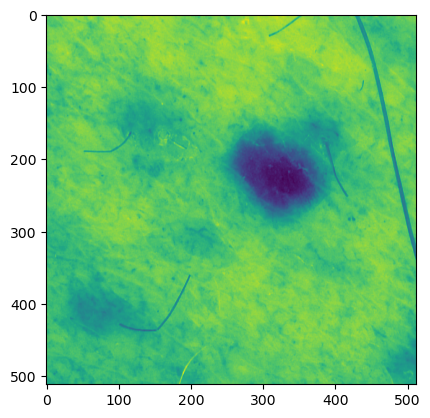

In [4]:
imshow(images[100])

In [5]:
masks.shape

(12311, 512, 512, 1)

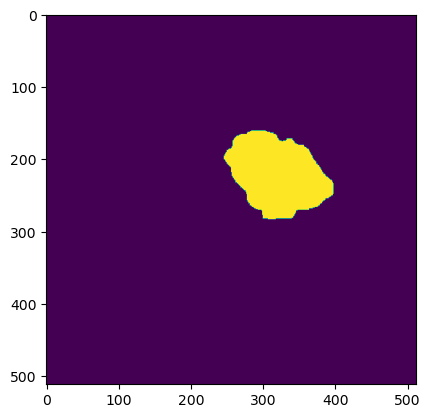

In [6]:
imshow(masks[100])

In [7]:
import sys
sys.path.append('../')
import gp2

In [8]:
from keras import losses

In [9]:
loss_fx = losses.BCE

In [10]:
C = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmp52vj_2tkkuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmp62hvsfskkuc_unet2d


In [11]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}
PERCENT_TO_REPLACE = 30

In [12]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmp62hvsfskkuc_unet2d
Verbose mode active!


In [13]:
R.classifier = C ### use custom classifier

In [14]:
R.setup_data(images, masks, dataset_size=12311, weights=weights)


Weights OK!


In [15]:
RUNS = 20

In [16]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier(batch_size=16)
    R.run_discriminator()
    l = R.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')

***
RUN: 0
Epoch 1/100
39/39 [==============================] - 39s 770ms/step - loss: 0.1612 - dice_coeff: 0.8206 - val_loss: 0.3077 - val_dice_coeff: 0.8125
Epoch 2/100
39/39 [==============================] - 24s 620ms/step - loss: 0.1591 - dice_coeff: 0.8184 - val_loss: 0.2431 - val_dice_coeff: 0.8193
Epoch 3/100
39/39 [==============================] - 24s 621ms/step - loss: 0.1503 - dice_coeff: 0.8330 - val_loss: 0.2187 - val_dice_coeff: 0.8237
Epoch 4/100
39/39 [==============================] - 25s 637ms/step - loss: 0.1507 - dice_coeff: 0.8362 - val_loss: 0.2347 - val_dice_coeff: 0.8201
Epoch 5/100
39/39 [==============================] - 24s 621ms/step - loss: 0.1549 - dice_coeff: 0.8234 - val_loss: 0.1927 - val_dice_coeff: 0.8321
Model saved to: /tmp/tmp62hvsfskkuc_unet2d/kuc_unet2d_0kuc_unet2d_model
History saved to: /tmp/tmp62hvsfskkuc_unet2d/kuc_unet2d_history_0.pkl
Testing the classifier...
Model saved to /tmp/tmp62hvsfskkuc_unet2d/cnnd_0.model
History saved to /tmp/tmp6

Epoch 4/100
77/77 [==============================] - 39s 506ms/step - loss: 0.1161 - dice_coeff: 0.8779 - val_loss: 0.1967 - val_dice_coeff: 0.8465
Epoch 5/100
77/77 [==============================] - 39s 502ms/step - loss: 0.0976 - dice_coeff: 0.8956 - val_loss: 0.2558 - val_dice_coeff: 0.8275
Epoch 6/100
77/77 [==============================] - 39s 503ms/step - loss: 0.0901 - dice_coeff: 0.9037 - val_loss: 0.2034 - val_dice_coeff: 0.8451
Epoch 7/100
77/77 [==============================] - 39s 504ms/step - loss: 0.0838 - dice_coeff: 0.9106 - val_loss: 0.4415 - val_dice_coeff: 0.7127
Epoch 8/100
77/77 [==============================] - 39s 505ms/step - loss: 0.0816 - dice_coeff: 0.9099 - val_loss: 0.2475 - val_dice_coeff: 0.8405
Epoch 9/100
77/77 [==============================] - 38s 501ms/step - loss: 0.1155 - dice_coeff: 0.8801 - val_loss: 0.2445 - val_dice_coeff: 0.8455
Epoch 10/100
77/77 [==============================] - 39s 503ms/step - loss: 0.0815 - dice_coeff: 0.9125 - val_l

Epoch 6/100
138/138 [==============================] - 61s 443ms/step - loss: 0.0241 - dice_coeff: 0.9743 - val_loss: 0.2801 - val_dice_coeff: 0.8828
Epoch 7/100
138/138 [==============================] - 62s 447ms/step - loss: 0.0233 - dice_coeff: 0.9750 - val_loss: 0.2628 - val_dice_coeff: 0.8786
Epoch 8/100
138/138 [==============================] - 61s 444ms/step - loss: 0.0225 - dice_coeff: 0.9760 - val_loss: 0.2958 - val_dice_coeff: 0.8841
Epoch 9/100
138/138 [==============================] - 61s 443ms/step - loss: 0.0224 - dice_coeff: 0.9760 - val_loss: 0.2941 - val_dice_coeff: 0.8802
Epoch 10/100
138/138 [==============================] - 61s 445ms/step - loss: 0.0210 - dice_coeff: 0.9776 - val_loss: 0.3072 - val_dice_coeff: 0.8835
Epoch 11/100
138/138 [==============================] - 61s 446ms/step - loss: 0.0223 - dice_coeff: 0.9763 - val_loss: 0.2850 - val_dice_coeff: 0.8819
Epoch 12/100
138/138 [==============================] - 61s 445ms/step - loss: 0.0207 - dice_coeff

Epoch 7/100
161/161 [==============================] - 69s 432ms/step - loss: 0.0140 - dice_coeff: 0.9851 - val_loss: 0.3230 - val_dice_coeff: 0.8861
Epoch 8/100
161/161 [==============================] - 69s 431ms/step - loss: 0.0136 - dice_coeff: 0.9855 - val_loss: 0.3263 - val_dice_coeff: 0.8873
Epoch 9/100
161/161 [==============================] - 69s 431ms/step - loss: 0.0134 - dice_coeff: 0.9856 - val_loss: 0.3319 - val_dice_coeff: 0.8868
Epoch 10/100
161/161 [==============================] - 69s 432ms/step - loss: 0.0134 - dice_coeff: 0.9856 - val_loss: 0.3419 - val_dice_coeff: 0.8821
Epoch 11/100
161/161 [==============================] - 70s 434ms/step - loss: 0.0132 - dice_coeff: 0.9858 - val_loss: 0.3406 - val_dice_coeff: 0.8852
Epoch 12/100
161/161 [==============================] - 69s 432ms/step - loss: 0.0130 - dice_coeff: 0.9859 - val_loss: 0.3519 - val_dice_coeff: 0.8845
Epoch 13/100
161/161 [==============================] - 69s 431ms/step - loss: 0.0133 - dice_coef

In [17]:
R.classifier_scores # after 20 runs of GP2

[[0.23297442495822906, 0.8142896890640259],
 [0.2930934727191925, 0.7885538339614868],
 [0.22154438495635986, 0.8127147555351257],
 [0.29299217462539673, 0.7752492427825928],
 [0.22158697247505188, 0.8409416675567627],
 [0.47817447781562805, 0.7548612952232361],
 [0.22358690202236176, 0.8452886939048767],
 [0.27857476472854614, 0.8299078941345215],
 [0.3744598627090454, 0.7618943452835083],
 [0.24561087787151337, 0.8377875089645386],
 [0.2588304281234741, 0.8745468258857727],
 [0.3301858603954315, 0.7862951755523682],
 [0.30246564745903015, 0.8762447834014893],
 [0.34683874249458313, 0.8789869546890259],
 [0.3354337811470032, 0.8829339742660522],
 [0.3718661367893219, 0.87779700756073],
 [0.3517524003982544, 0.8879973292350769],
 [0.33620020747184753, 0.8438862562179565],
 [0.2839164435863495, 0.8849679231643677],
 [0.26006248593330383, 0.8872199058532715]]

In [18]:
R.discriminator_scores # after 20 runs of GP2

[[0.1907224953174591, 0.9972899556159973],
 [0.15928591787815094, 0.998645007610321],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.1625939905643463, 0.998645007610321],
 [0.0, 1.0],
 [0.024322794750332832, 0.998645007610321],
 [0.03128492459654808, 0.998645007610321],
 [0.030050432309508324, 0.998645007610321],
 [0.16760915517807007, 0.998645007610321],
 [0.0, 1.0],
 [0.1588565707206726, 0.998645007610321],
 [0.15883061289787292, 0.998645007610321],
 [0.40630459785461426, 0.998645007610321],
 [0.4060983955860138, 0.998645007610321],
 [0.40616706013679504, 0.998645007610321],
 [0.0, 1.0],
 [0.02935444749891758, 0.998645007610321],
 [0.4353547990322113, 0.9972899556159973]]

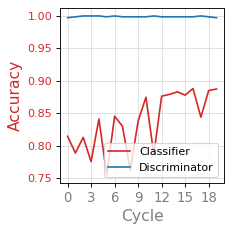

In [19]:
R.plot() # after 20 runs of GP2

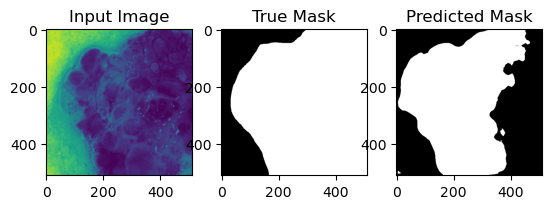

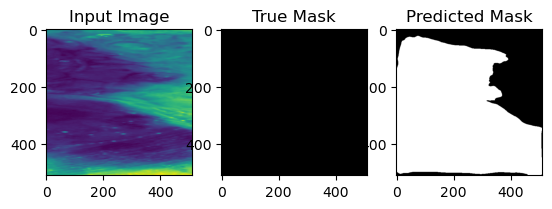

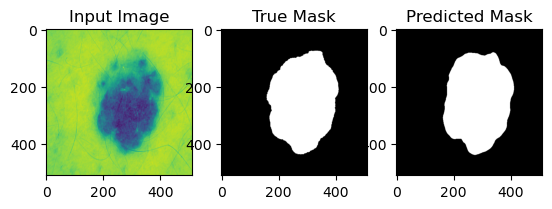

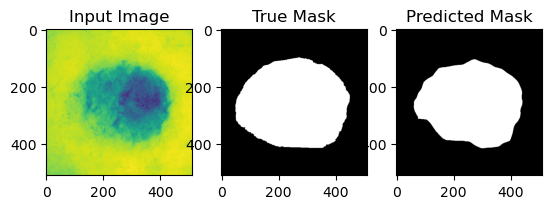

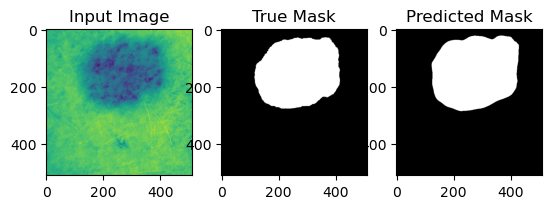

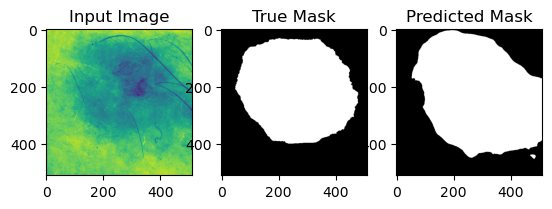

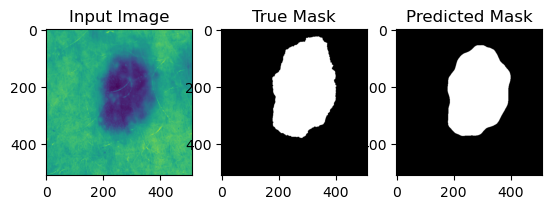

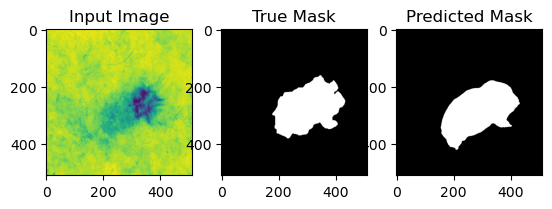

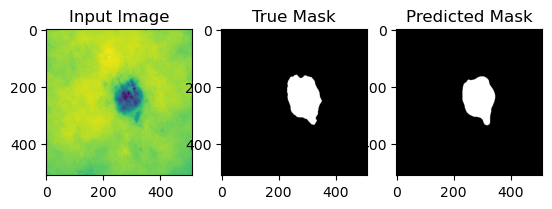

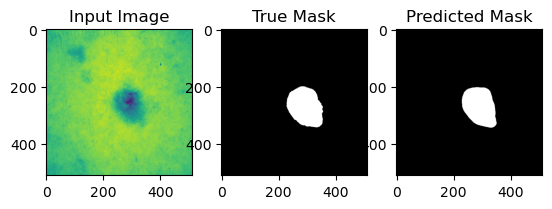

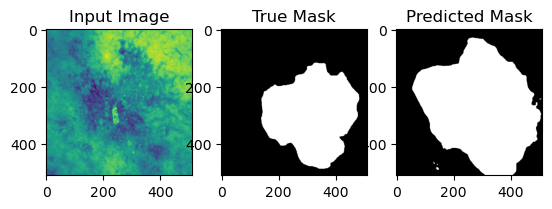

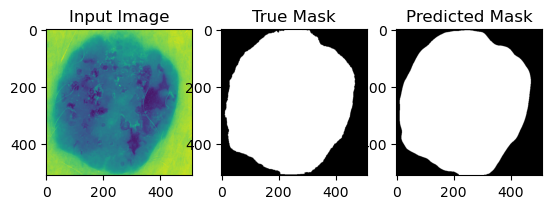

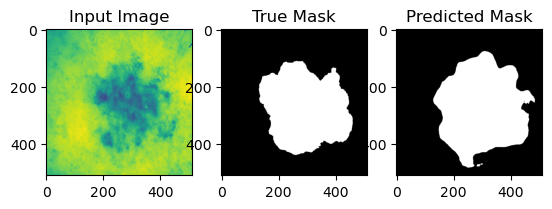

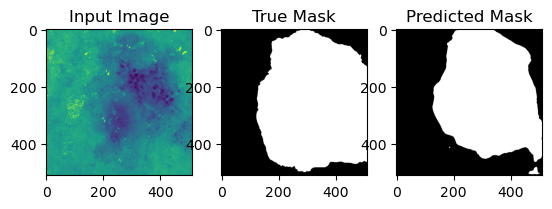

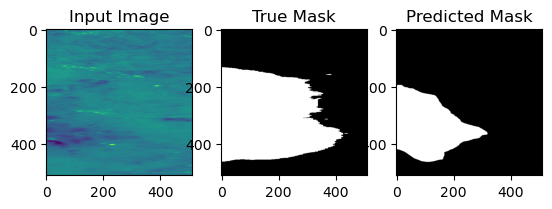

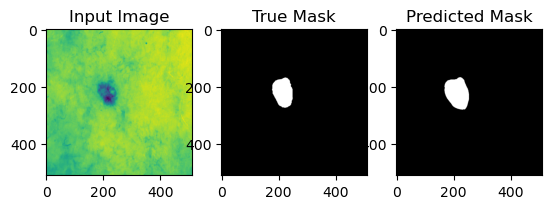

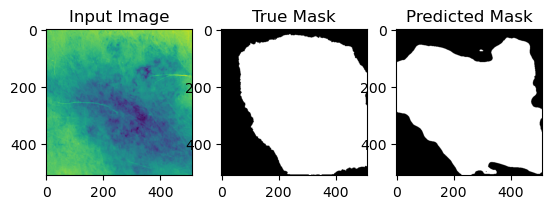

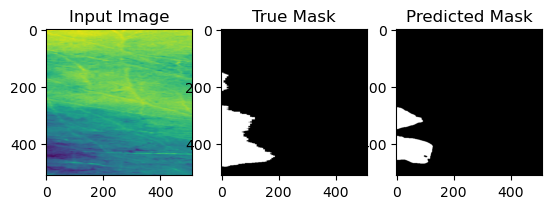

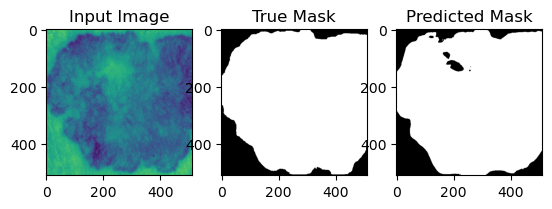

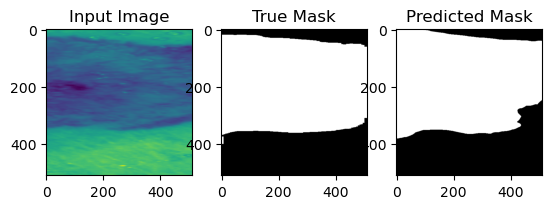

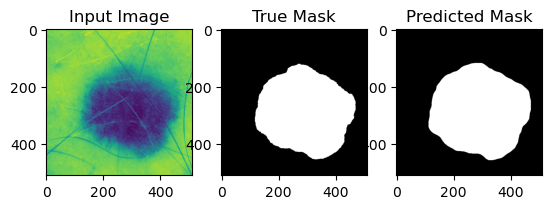

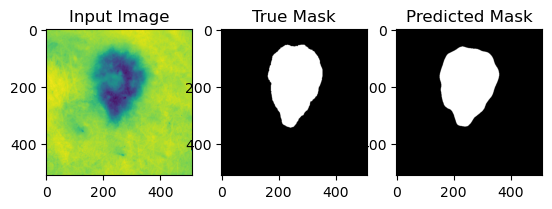

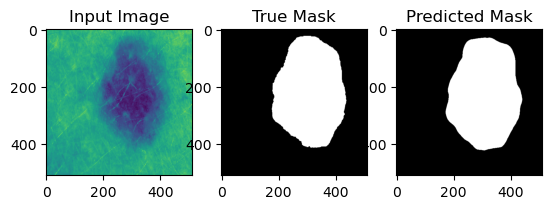

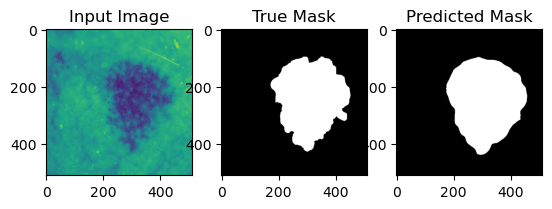

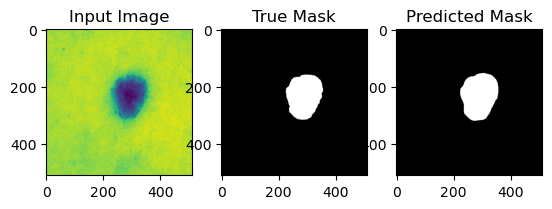

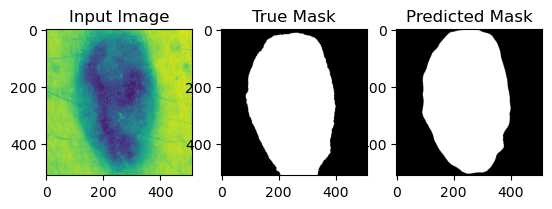

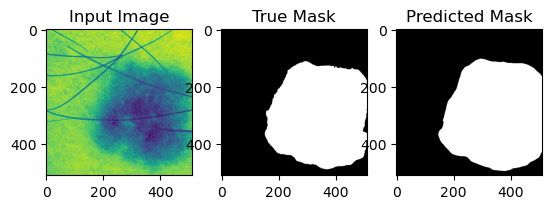

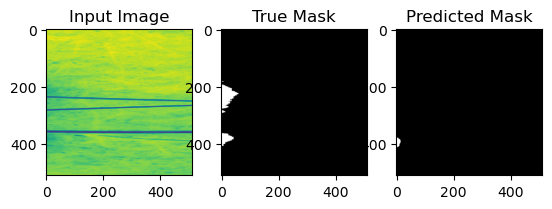

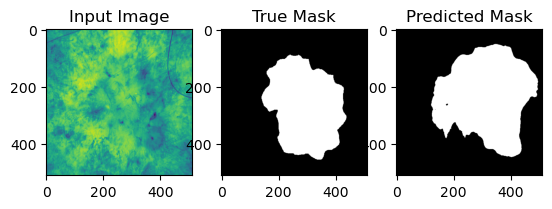

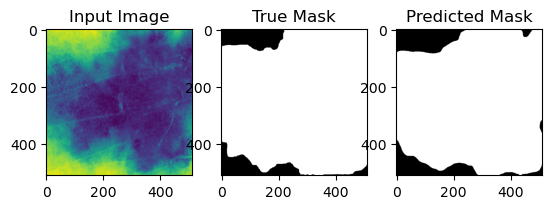

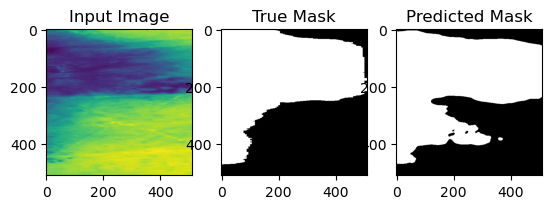

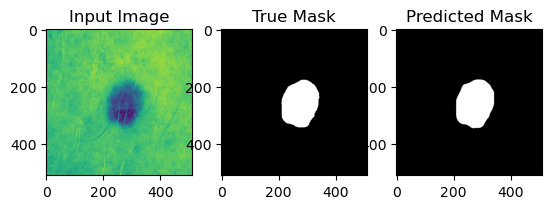

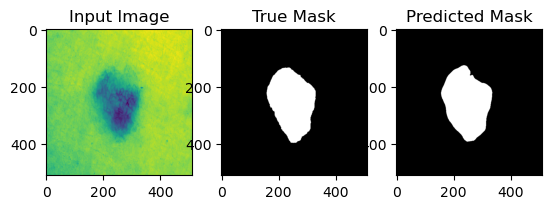

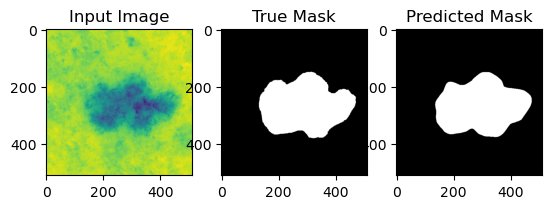

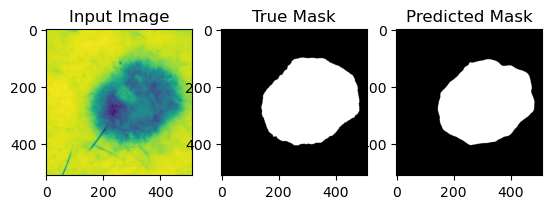

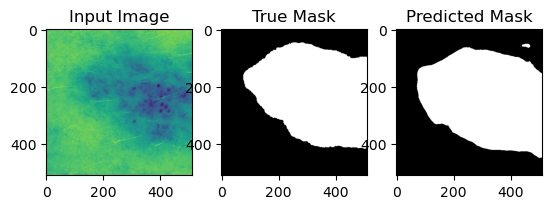

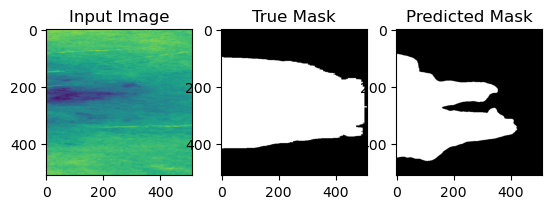

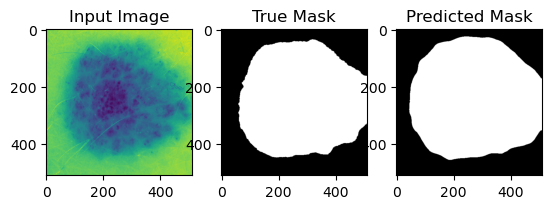

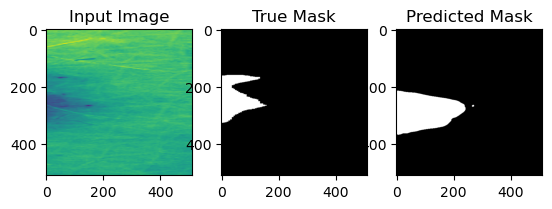

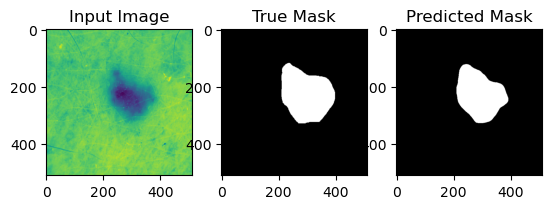

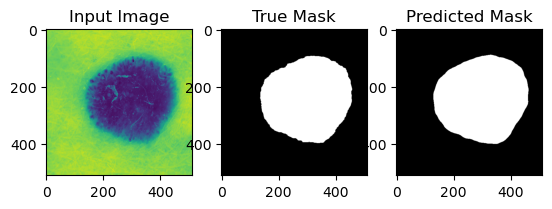

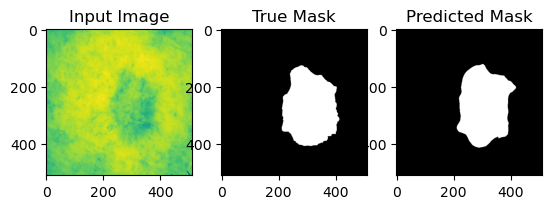

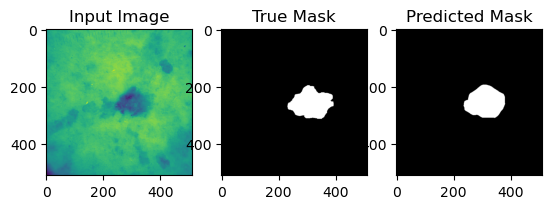

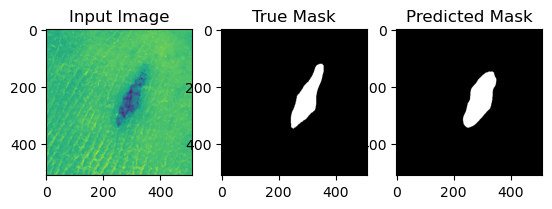

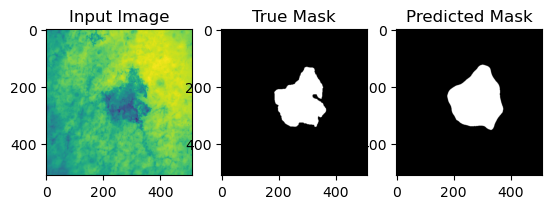

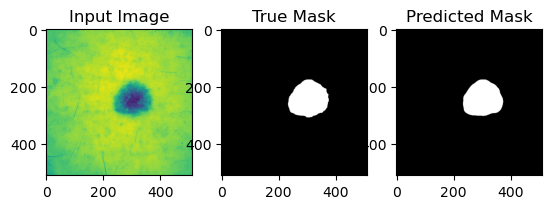

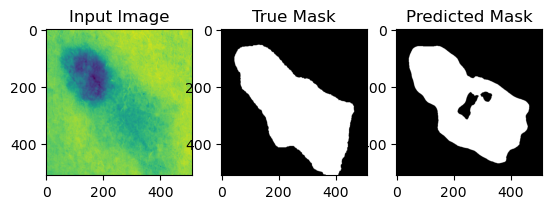

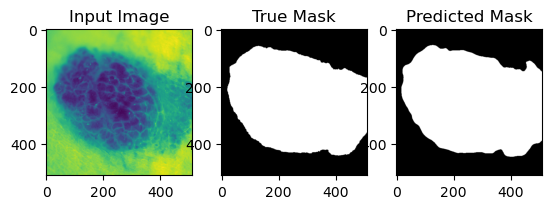

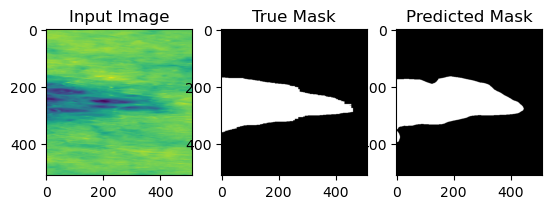

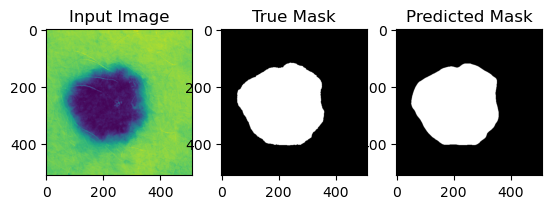

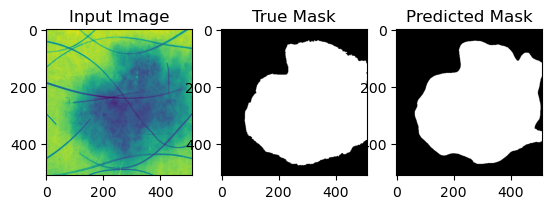

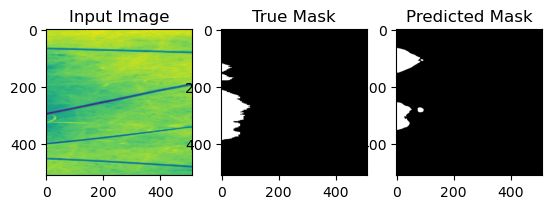

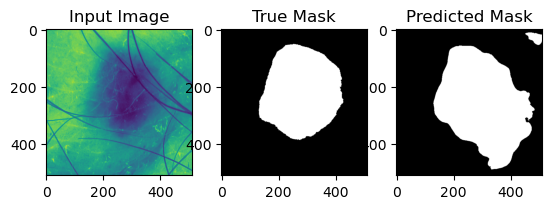

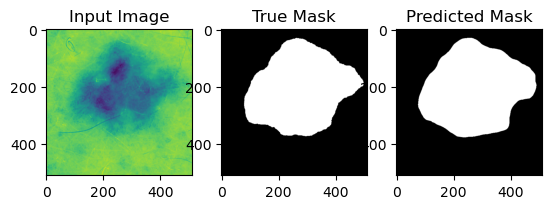

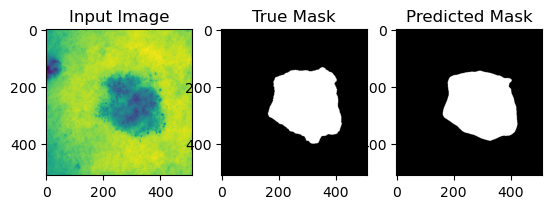

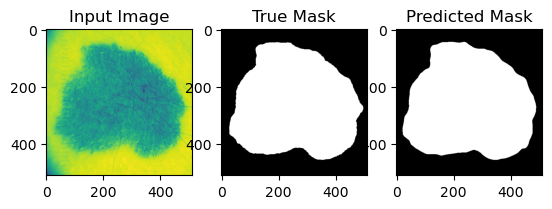

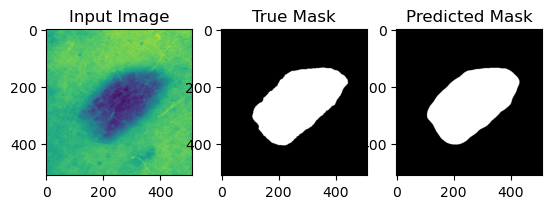

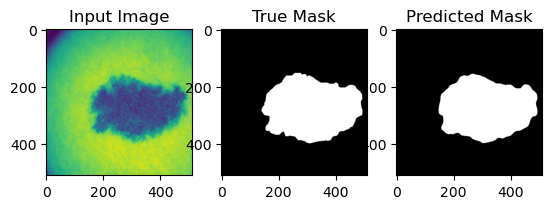

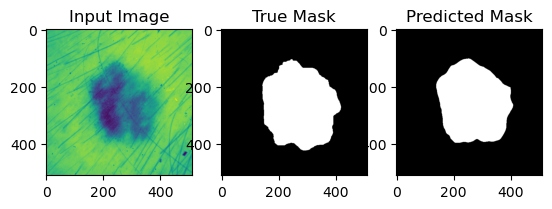

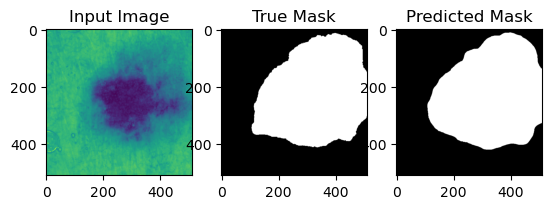

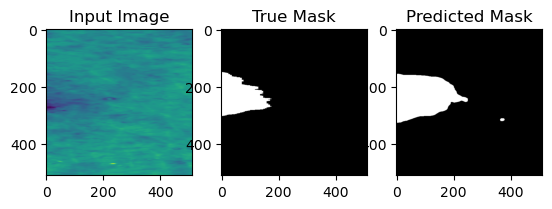

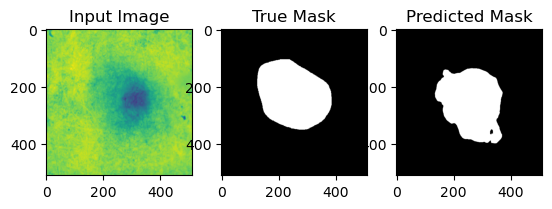

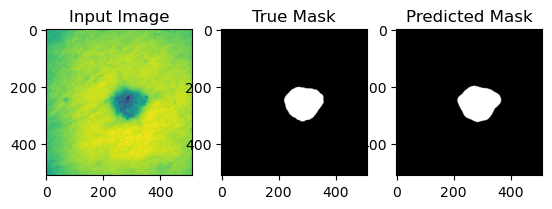

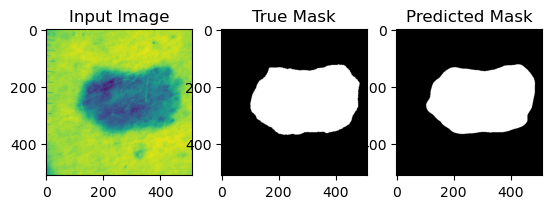

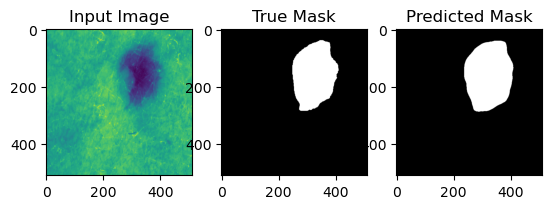

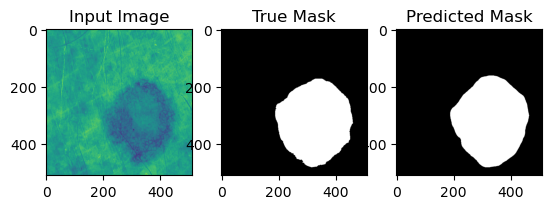

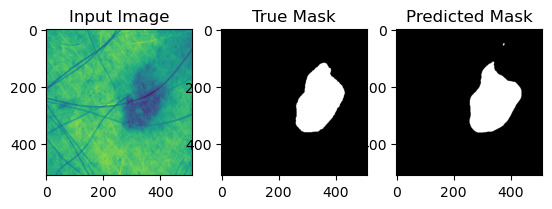

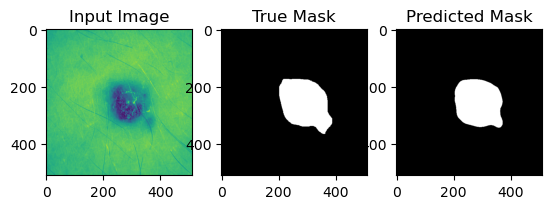

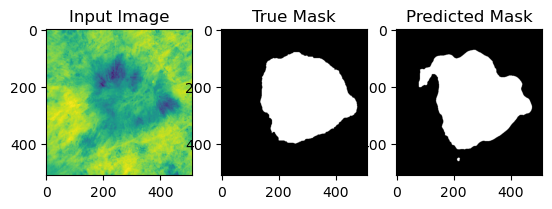

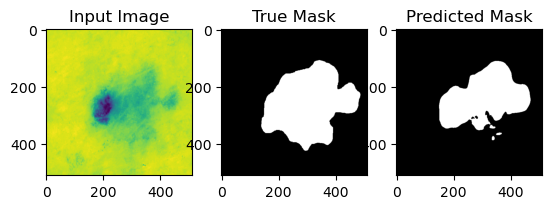

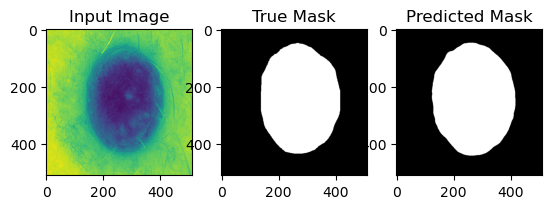

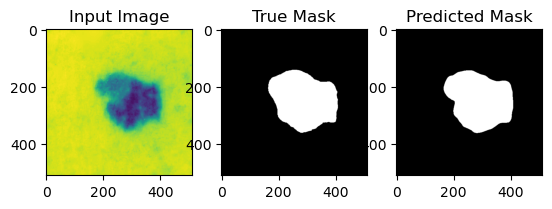

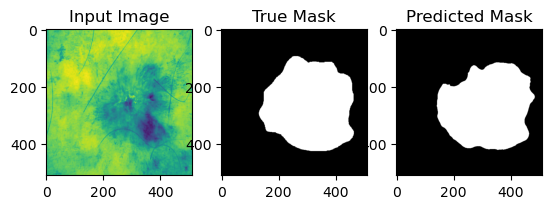

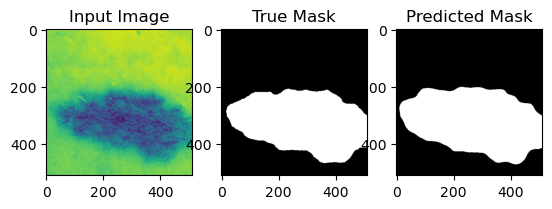

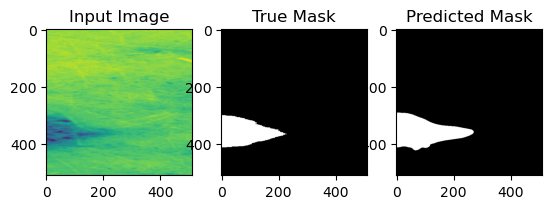

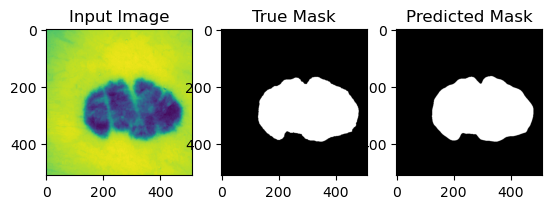

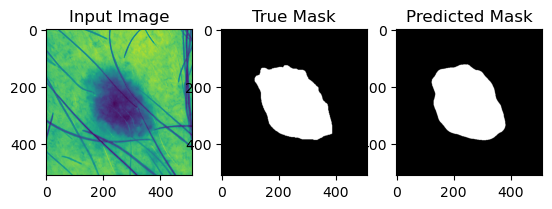

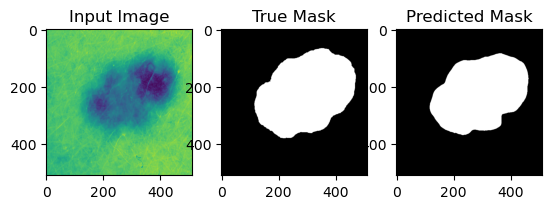

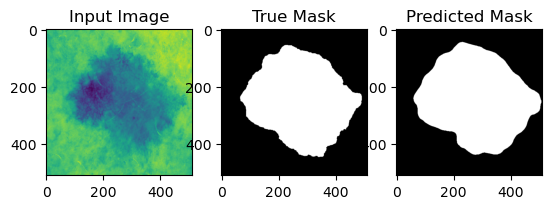

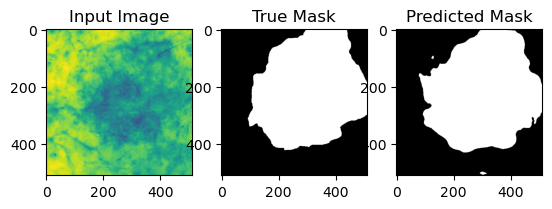

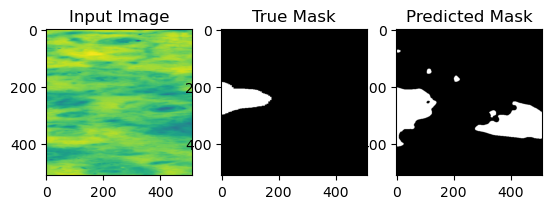

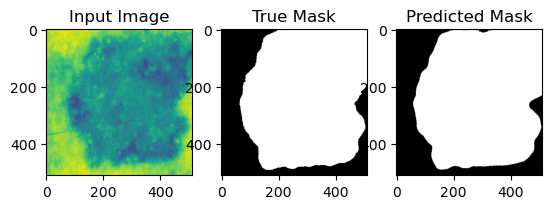

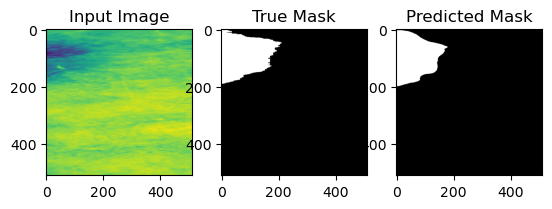

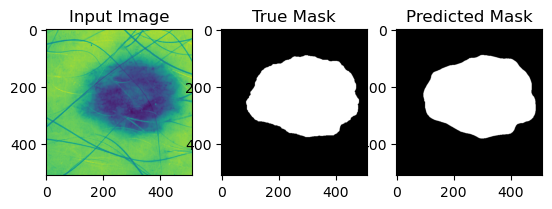

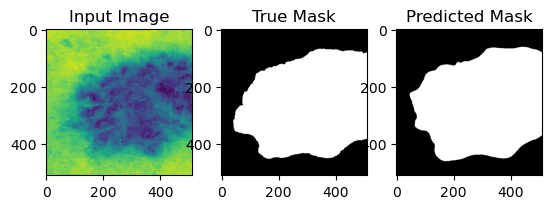

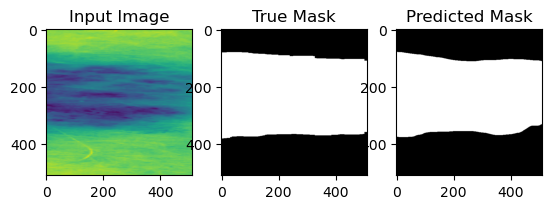

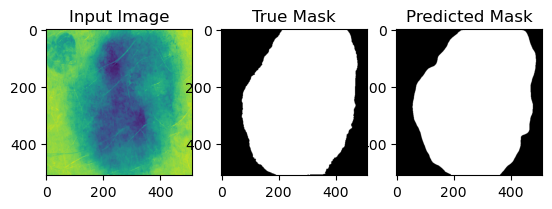

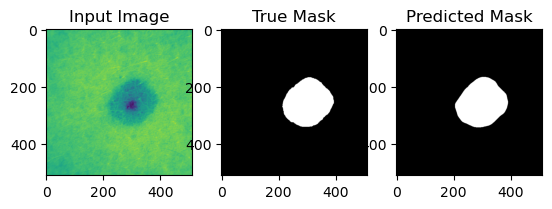

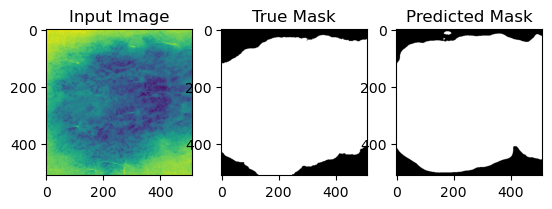

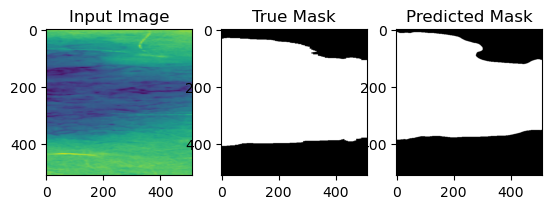

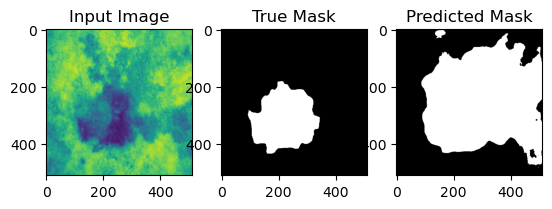

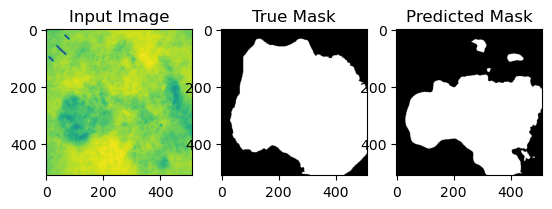

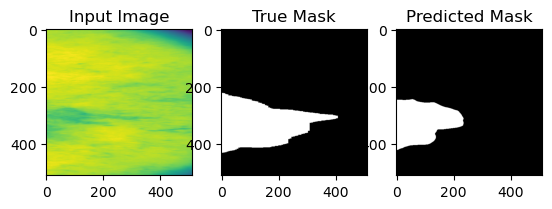

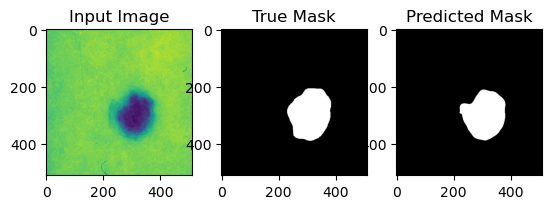

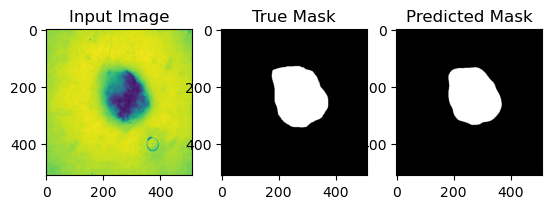

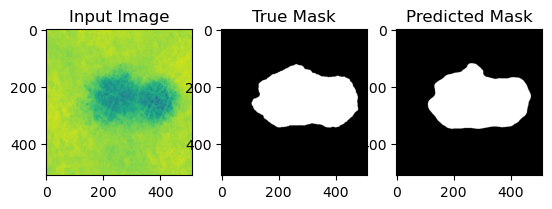

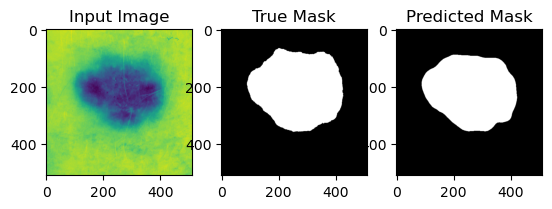

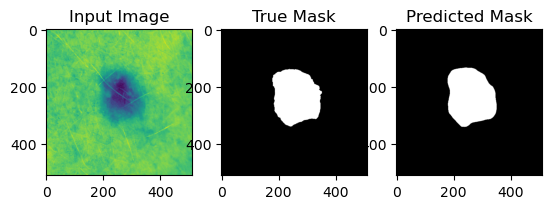

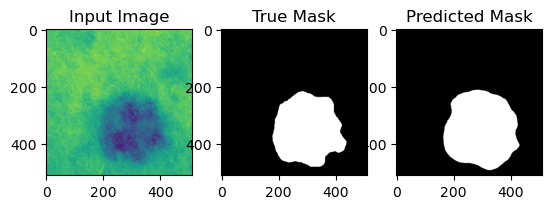

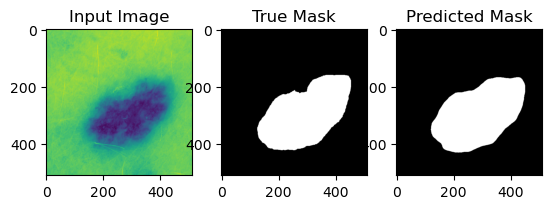

In [20]:
gp2.Util.visualize_predictions(C, images[1000:1500], masks[1000:1500], num_samples=100) # after 20 runs of GP2